In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns

In [4]:
from pandas_profiling import ProfileReport

## 1 zingsnis duomenu uzkrovimas

In [5]:
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

In [6]:
df.iloc[:1]

Title                                   Genre  \
0  Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   

                                                Tags         Languages  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish   

  Series or Movie  Hidden Gem Score Country Availability       Runtime  \
0          Series               4.3             Thailand  < 30 minutes   

          Director                 Writer  ... Netflix Release Date  \
0  Tomas Alfredson  John Ajvide Lindqvist  ...           2021-03-04   

            Production House                            Netflix Link  \
0  Canal+, Sandrew Metronome  https://www.netflix.com/watch/81415947   

                              IMDb Link  \
0  https://www.imdb.com/title/tt1139797   

                                             Summary  IMDb Votes  \
0  A med student with a supernatural gift tries t...    205926.0   

                                               Image  \
0  https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...   

                                              Poster TMDb Trailer Trailer Site  
0  https://m.media-amazon.com/images/M/MV5BOWM4NT...          NaN          NaN  

[1 rows x 29 columns]

## 2 zingsnis ProfileReport

In [7]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative = True)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3 zingsnis NLTK

In [8]:
import re # for regex

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk import punkt
import nltk
nltk.download('stopwords')
nltk.download('punkt')

#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
#from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Monikute\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Monikute\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
print(df.shape)

(15480, 29)


#### 1. Remove HTML tags
Regex rule : ‘<.*?>’

In [10]:
# numetu NaN reiksmes pagal stulpeli 'Summary'
df = df.dropna(subset=['Summary'])

In [11]:
print(df.shape)

(15471, 29)


In [12]:
import re
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)


df.Summary = df.Summary.apply(clean) 
df.Summary[:5]

0    A med student with a supernatural gift tries t...
1    When nerdy Johanna moves to London, things get...
2    Trapped in a frozen car during a blizzard, a p...
3    Upon moving into a new place, a 20-something r...
4    Inspired by her moms rebellious past and a con...
Name: Summary, dtype: object

#### 2. Remove special characters

In [13]:
# specialius simbolius pakeicia i tarpus, isskyrus apostrofa ' 
def is_special(text):
    rem = ''
    for i in text:
        if (i.isalnum())|(i == "\'"):
            rem = rem + i
        else:
            rem = rem + ' '
    return rem


df.Summary = df.Summary.apply(is_special)
df.Summary[100:105]

100    After arriving at the wrong destination  a cou...
101    A struggling music student discovers and tries...
102    After falling for Geez  a heartthrob at school...
103    For years  he ruled Chicago during Prohibition...
104    Returning to their ancestral lands  descendant...
Name: Summary, dtype: object

#### 3. Convert everything to lowercase

In [14]:
def to_lower(text):
    return text.lower()  
    
df.Summary = df.Summary.apply(to_lower)
df.Summary[100:105]

100    after arriving at the wrong destination  a cou...
101    a struggling music student discovers and tries...
102    after falling for geez  a heartthrob at school...
103    for years  he ruled chicago during prohibition...
104    returning to their ancestral lands  descendant...
Name: Summary, dtype: object

#### 4. Remove stopwords

In [15]:
def rem_stopwords(text):
    if isinstance(text,str):
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text)
        return [w for w in words if w not in stop_words]
    else:
        return text


df.Summary = df.Summary.apply(rem_stopwords)

In [16]:
print(df.Summary[:5])

0    [med, student, supernatural, gift, tries, cash...
1    [nerdy, johanna, moves, london, things, get, h...
2    [trapped, frozen, car, blizzard, pregnant, wom...
3    [upon, moving, new, place, 20, something, runs...
4    [inspired, moms, rebellious, past, confident, ...
Name: Summary, dtype: object


####  5. Stem the words

In [17]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df.Summary = df.Summary.apply(stem_txt)

In [18]:
df.Summary[:5]

0    med student supernatur gift tri cash abil face...
1    nerdi johanna move london thing get hand reinv...
2    trap frozen car blizzard pregnant woman husban...
3    upon move new place 20 someth run former flame...
4    inspir mom rebelli past confid new friend shi ...
Name: Summary, dtype: object

#### 6.BAG OF WORDS

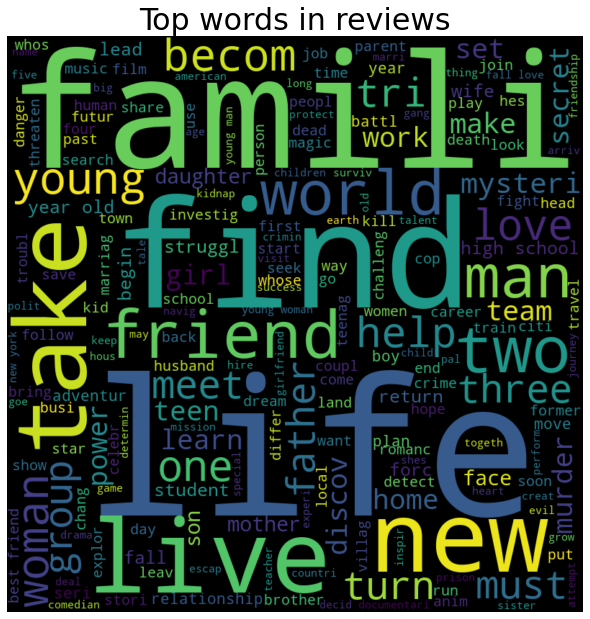

In [19]:
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string

def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(df['Summary'], title="Top words in reviews")

## 3 zingsnis SweetViz
#### SweetViz report reikalauja, kad tiksline Series reiksme butu skaitine

In [20]:
import sweetviz as sv

In [21]:
def s_m(text):
    if text == 'Movie':
        text = 1
    else:
        text = 0
    return text
        

#### Tipai
'b'       boolean
'i'       (signed) integer
'u'       unsigned integer
'f'       floating-point
'c'       complex-floating point
'O'       (Python) objects
'S', 'a'  (byte-)string
'U'       Unicode
'V'       raw data (void)

In [22]:
df1 = pd.DataFrame({'float': [1.0],
                    'int': [1],
                    'datetime': [pd.Timestamp('20180310')],
                    'string': ['foo']})
print(df1)
print(df1['float'].dtype,df1['int'].dtype,df1['datetime'].dtype,df1['string'].dtype, df1['string'].dtype)

   float  int   datetime string
0    1.0    1 2018-03-10    foo
float64 int64 datetime64[ns] object object


In [23]:
df["Series or Movie"].describe()

count     15471
unique        2
top       Movie
freq      11689
Name: Series or Movie, dtype: object

In [24]:
df['Ar_movie'] = df['Series or Movie'].apply(s_m)

In [25]:
df['Ar_movie'].dtype

dtype('int64')

In [26]:
df['Ar_movie'].value_counts()

1    11689
0     3782
Name: Ar_movie, dtype: int64

In [27]:
config = sv.FeatureConfig(force_num=['Ar_movie'])
my_report = sv.analyze(df, feat_cfg=config, target_feat ='Ar_movie')
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [28]:
# keiciu 'runtime' kategorines reiksmes i skaicius
runtime_value = list(df.Runtime.unique())
values = [2,4,5,3,1]
ats = dict(zip(runtime_value, values))
print(ats)

def run_v(text):
    return ats[text]

{'< 30 minutes': 2, '1-2 hour': 4, '> 2 hrs': 5, '30-60 mins': 3, nan: 1}


In [29]:
df['Runtime'] = df['Runtime'].apply(run_v,ats)
df['Runtime'][:6]    

0    2
1    4
2    4
3    2
4    4
5    5
Name: Runtime, dtype: int64

In [30]:
config = sv.FeatureConfig(force_num=['Runtime'])
my_report = sv.analyze(df, feat_cfg=config, target_feat ='Ar_movie')
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 4 zingsnis Tvarkymas 'Genre'

In [31]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site', 'Ar_movie'],
      dtype='object')

In [32]:
df['Genre'].isna().sum()

1709

In [33]:
df['Tags'] = df['Tags'].fillna(value='ne')

In [34]:
df['Tags'].describe()

count     15471
unique    13373
top          ne
freq         67
Name: Tags, dtype: object

In [35]:
df['Genre'] = df['Genre'].fillna(value='ne')

In [36]:
df['Genre'].describe()

count     15471
unique     1780
top          ne
freq       1709
Name: Genre, dtype: object

In [37]:
df.loc[0,'Genre']

'Crime, Drama, Fantasy, Horror, Romance'

In [38]:
df['Tags'].value_counts()[:3]

ne          67
Dramas      67
Comedies    37
Name: Tags, dtype: int64

In [39]:
from collections import Counter

In [40]:
df['Tags'][0]

'Comedy Programmes,Romantic TV Comedies,Horror Programmes,Thai TV Programmes'

In [41]:
df['Genre'][0]

'Crime, Drama, Fantasy, Horror, Romance'

In [42]:
tags = df['Tags'].apply(lambda x: pd.Series(Counter(x.split(','))) )
genres = df['Genre'].apply(lambda x: pd.Series(Counter(x.split(','))) )

In [43]:
# puiku, tik vienetukai
genres

Crime   Drama   Fantasy   Horror   Romance  Comedy  Drama   Thriller  \
0        1.0     1.0       1.0      1.0       1.0     NaN    NaN        NaN   
1        NaN     NaN       NaN      NaN       NaN     1.0    NaN        NaN   
2        NaN     NaN       NaN      NaN       NaN     NaN    1.0        1.0   
3        NaN     NaN       NaN      NaN       NaN     NaN    1.0        NaN   
4        NaN     1.0       NaN      NaN       NaN     NaN    NaN        NaN   
...      ...     ...       ...      ...       ...     ...    ...        ...   
15475    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   
15476    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   
15477    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   
15478    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   
15479    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   

       Animation   Short  ...  Game-Show  News   Talk-Show   Documentary  \
0            NaN     NaN  ...        NaN   NaN         NaN           NaN   
1            NaN     NaN  ...        NaN   NaN         NaN           NaN   
2            NaN     NaN  ...        NaN   NaN         NaN           NaN   
3            NaN     NaN  ...        NaN   NaN         NaN           NaN   
4            1.0     1.0  ...        NaN   NaN         NaN           NaN   
...          ...     ...  ...        ...   ...         ...           ...   
15475        NaN     NaN  ...        NaN   NaN         NaN           NaN   
15476        NaN     NaN  ...        NaN   NaN         NaN           NaN   
15477        1.0     NaN  ...        NaN   NaN         NaN           NaN   
15478        1.0     NaN  ...        NaN   NaN         NaN           NaN   
15479        1.0     NaN  ...        NaN   NaN         NaN           NaN   

       Sport  War  History  Adult  Western   News  
0        NaN  NaN      NaN    NaN      NaN    NaN  
1        NaN  NaN      NaN    NaN      NaN    NaN  
2        NaN  NaN      NaN    NaN      NaN    NaN  
3        NaN  NaN      NaN    NaN      NaN    NaN  
4        NaN  NaN      NaN    NaN      NaN    NaN  
...      ...  ...      ...    ...      ...    ...  
15475    NaN  NaN      NaN    NaN      NaN    NaN  
15476    NaN  NaN      NaN    NaN      NaN    NaN  
15477    NaN  NaN      NaN    NaN      NaN    NaN  
15478    NaN  NaN      NaN    NaN      NaN    NaN  
15479    NaN  NaN      NaN    NaN      NaN    NaN  

[15471 rows x 56 columns]

#### Tikslas: pakeisti ' genres', kad vietuoj 1.0 butu svertai 0.0-1.0 priklausomai nuo pozicijos genre aprasymuose

In [44]:
g1 = df['Genre'].apply(lambda x: pd.Series(Counter(x.split(','))))
g1[:2]

Crime   Drama   Fantasy   Horror   Romance  Comedy  Drama   Thriller  \
0    1.0     1.0       1.0      1.0       1.0     NaN    NaN        NaN   
1    NaN     NaN       NaN      NaN       NaN     1.0    NaN        NaN   

   Animation   Short  ...  Game-Show  News   Talk-Show   Documentary  Sport  \
0        NaN     NaN  ...        NaN   NaN         NaN           NaN    NaN   
1        NaN     NaN  ...        NaN   NaN         NaN           NaN    NaN   

   War  History  Adult  Western   News  
0  NaN      NaN    NaN      NaN    NaN  
1  NaN      NaN    NaN      NaN    NaN  

[2 rows x 56 columns]

In [45]:
g = df['Genre'].apply(lambda x: pd.Series(x.split(',')))
g[:2]

0       1         2        3         4    5    6    7    8    9    10  \
0   Crime   Drama   Fantasy   Horror   Romance  NaN  NaN  NaN  NaN  NaN  NaN   
1  Comedy     NaN       NaN      NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    11  
0  NaN  
1  NaN

In [46]:
g['kiek'] = g.apply(lambda x: x.notna().sum(), axis = 1)
g[:2]

0       1         2        3         4    5    6    7    8    9   10  \
0   Crime   Drama   Fantasy   Horror   Romance  NaN  NaN  NaN  NaN  NaN  NaN   
1  Comedy     NaN       NaN      NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    11  kiek  
0  NaN     5  
1  NaN     1

In [47]:
gw = g.copy() # gw laikys svertus

In [48]:
# ciklas suskaiciuoti svertams
for i in g.index:
    viso_eiluteje = g.loc[i,'kiek']
    for j in range(viso_eiluteje):
        try: 
            gw.loc[i,j] = (viso_eiluteje-j)*2/((viso_eiluteje +1)*viso_eiluteje)
        except:
            print(i,j)
# buvo klaidos su iloc

In [49]:
gw[-5:] 

0         1         2    3    4    5    6    7    8    9   10   11  \
15475  1.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15476  1.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15477  0.5  0.333333  0.166667  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15478  0.5  0.333333  0.166667  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15479  0.4       0.3       0.2  0.1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       kiek  
15475     1  
15476     1  
15477     3  
15478     3  
15479     4

In [50]:
# apjungiu genre rusis ir svertus
genre_w = pd.merge(g, gw, left_index=True, right_index=True, suffixes=('', '_w'))

In [51]:
genre_w[-5:]

0        1        2        3    4    5    6    7    8    9  \
15475         ne      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15476         ne      NaN      NaN      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15477  Animation   Comedy   Family      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15478  Animation   Comedy   Family      NaN  NaN  NaN  NaN  NaN  NaN  NaN   
15479  Animation   Action   Comedy   Family  NaN  NaN  NaN  NaN  NaN  NaN   

       ...  3_w  4_w  5_w  6_w  7_w  8_w  9_w 10_w 11_w kiek_w  
15475  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      1  
15476  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      1  
15477  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      3  
15478  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      3  
15479  ...  0.1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      4  

[5 rows x 26 columns]

In [52]:
g1.shape

(15471, 56)

In [53]:
g1.index[15470] # paskutinis

15479

In [54]:
g1.index.get_loc(15479)

15470

In [55]:
g1.loc[15479,'Crime']

nan

In [56]:
for i in g1.index:
    for j in range(genre_w.loc[i,'kiek']):
        g1.loc[i,[genre_w.loc[i,str(j)]]] = genre_w.loc[i,str(j)+'_w']

In [57]:
g1[-5:]

Crime   Drama   Fantasy   Horror   Romance  Comedy  Drama   Thriller  \
15475    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   
15476    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   
15477    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   
15478    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   
15479    NaN     NaN       NaN      NaN       NaN     NaN    NaN        NaN   

       Animation   Short  ...  Game-Show  News   Talk-Show   Documentary  \
15475        NaN     NaN  ...        NaN   NaN         NaN           NaN   
15476        NaN     NaN  ...        NaN   NaN         NaN           NaN   
15477        0.5     NaN  ...        NaN   NaN         NaN           NaN   
15478        0.5     NaN  ...        NaN   NaN         NaN           NaN   
15479        0.4     NaN  ...        NaN   NaN         NaN           NaN   

       Sport  War  History  Adult  Western   News  
15475    NaN  NaN      NaN    NaN      NaN    NaN  
15476    NaN  NaN      NaN    NaN      NaN    NaN  
15477    NaN  NaN      NaN    NaN      NaN    NaN  
15478    NaN  NaN      NaN    NaN      NaN    NaN  
15479    NaN  NaN      NaN    NaN      NaN    NaN  

[5 rows x 56 columns]

In [58]:
g1.loc[g1.sum(axis = 1)>1.0001].sum(axis = 1)

Series([], dtype: float64)

In [59]:
g1.sum().nlargest(10)

Comedy         2469.511905
Drama          1904.738095
ne             1709.000000
 Drama         1050.531374
Action         1049.766667
Documentary     800.938095
Animation       742.066689
 Romance        518.915584
 Comedy         425.076951
 Thriller       416.028477
dtype: float64

In [60]:
from pandasgui import show
gui = show(g1)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [61]:
import seaborn as sns
sns.set_theme(style="white", color_codes=True)

In [62]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site', 'Ar_movie'],
      dtype='object')

In [63]:
g1_imdb = pd.merge(df['IMDb Score'], g1, left_index=True, right_index=True)
g1_imdb

IMDb Score     Crime     Drama   Fantasy    Horror   Romance  Comedy  \
0             7.9  0.333333  0.266667       0.2  0.133333  0.066667     NaN   
1             5.8       NaN       NaN       NaN       NaN       NaN     1.0   
2             4.3       NaN       NaN       NaN       NaN       NaN     NaN   
3             6.5       NaN       NaN       NaN       NaN       NaN     NaN   
4             6.3       NaN  0.166667       NaN       NaN       NaN     NaN   
...           ...       ...       ...       ...       ...       ...     ...   
15475         NaN       NaN       NaN       NaN       NaN       NaN     NaN   
15476         NaN       NaN       NaN       NaN       NaN       NaN     NaN   
15477         6.8       NaN       NaN       NaN       NaN       NaN     NaN   
15478         6.4       NaN       NaN       NaN       NaN       NaN     NaN   
15479         6.2       NaN       NaN       NaN       NaN       NaN     NaN   

          Drama   Thriller  Animation  ...  Game-Show  News   Talk-Show  \
0           NaN        NaN        NaN  ...        NaN   NaN         NaN   
1           NaN        NaN        NaN  ...        NaN   NaN         NaN   
2      0.666667   0.333333        NaN  ...        NaN   NaN         NaN   
3      1.000000        NaN        NaN  ...        NaN   NaN         NaN   
4           NaN        NaN        0.5  ...        NaN   NaN         NaN   
...         ...        ...        ...  ...        ...   ...         ...   
15475       NaN        NaN        NaN  ...        NaN   NaN         NaN   
15476       NaN        NaN        NaN  ...        NaN   NaN         NaN   
15477       NaN        NaN        0.5  ...        NaN   NaN         NaN   
15478       NaN        NaN        0.5  ...        NaN   NaN         NaN   
15479       NaN        NaN        0.4  ...        NaN   NaN         NaN   

        Documentary  Sport  War  History  Adult  Western   News  
0               NaN    NaN  NaN      NaN    NaN      NaN    NaN  
1               NaN    NaN  NaN      NaN    NaN      NaN    NaN  
2               NaN    NaN  NaN      NaN    NaN      NaN    NaN  
3               NaN    NaN  NaN      NaN    NaN      NaN    NaN  
4               NaN    NaN  NaN      NaN    NaN      NaN    NaN  
...             ...    ...  ...      ...    ...      ...    ...  
15475           NaN    NaN  NaN      NaN    NaN      NaN    NaN  
15476           NaN    NaN  NaN      NaN    NaN      NaN    NaN  
15477           NaN    NaN  NaN      NaN    NaN      NaN    NaN  
15478           NaN    NaN  NaN      NaN    NaN      NaN    NaN  
15479           NaN    NaN  NaN      NaN    NaN      NaN    NaN  

[15471 rows x 57 columns]

## 5 zingsnis skaitines reiksmes

In [64]:
# pertvarkau 'IMDb Votes' NaN i 0 - nebalsavo
print(df['IMDb Votes'].describe())
df['IMDb Votes'] = df['IMDb Votes'].fillna(0)
df['IMDb Votes'].describe()

count    1.337200e+04
mean     4.273844e+04
std      1.257315e+05
min      5.000000e+00
25%      4.030000e+02
50%      2.320500e+03
75%      2.088775e+04
max      2.354197e+06
Name: IMDb Votes, dtype: float64


count    1.547100e+04
mean     3.693998e+04
std      1.178036e+05
min      0.000000e+00
25%      1.310000e+02
50%      1.395000e+03
75%      1.392950e+04
max      2.354197e+06
Name: IMDb Votes, dtype: float64

In [65]:
df['IMDb Votes'].value_counts(normalize=True)

0.0         0.135673
7.0         0.003232
10.0        0.002456
8.0         0.002327
9.0         0.001939
              ...   
20598.0     0.000065
224642.0    0.000065
8713.0      0.000065
14495.0     0.000065
167842.0    0.000065
Name: IMDb Votes, Length: 7883, dtype: float64

In [66]:
my_report = sv.analyze(df, target_feat ='IMDb Votes')
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [67]:
# pertvarkau 'IMDb Score' NaN i 0 - negavo
print(df['IMDb Score'].describe())
df['IMDb Score'] = df['IMDb Score'].fillna(0)
df['IMDb Score'].describe()

count    13374.000000
mean         6.496202
std          1.146893
min          1.000000
25%          5.800000
50%          6.600000
75%          7.300000
max          9.700000
Name: IMDb Score, dtype: float64


count    15471.000000
mean         5.615681
std          2.466192
min          0.000000
25%          5.300000
50%          6.400000
75%          7.200000
max          9.700000
Name: IMDb Score, dtype: float64

In [68]:
df['IMDb Score'].value_counts(normalize=True)

0.0    0.135544
6.5    0.032836
6.6    0.032771
6.8    0.032577
6.3    0.032189
         ...   
1.6    0.000129
9.4    0.000065
9.7    0.000065
1.5    0.000065
1.0    0.000065
Name: IMDb Score, Length: 84, dtype: float64

## 6 zingsnis DateTime

In [69]:
print(df['Release Date'].info())
print(df['Release Date'].dtype)

<class 'pandas.core.series.Series'>
Int64Index: 15471 entries, 0 to 15479
Series name: Release Date
Non-Null Count  Dtype 
--------------  ----- 
13365 non-null  object
dtypes: object(1)
memory usage: 757.8+ KB
None
object


In [70]:
# keiciu i datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])
print(df['Release Date'].dtype)

datetime64[ns]


In [71]:
print(df['Release Date'].describe()) 
df['Release Date'].isna().sum()

count                   13365
unique                   5311
top       2017-09-01 00:00:00
freq                       24
first     1910-04-25 00:00:00
last      2022-10-14 00:00:00
Name: Release Date, dtype: object


2106

In [72]:
# ismetu NaN
isleido = pd.DataFrame()
isleido['Release Date'] = df['Release Date'].dropna()
type(isleido)

pandas.core.frame.DataFrame

In [73]:
isleido['Release Date'] = pd.to_datetime(isleido['Release Date'])
print(isleido['Release Date'].dtype)

datetime64[ns]


<AxesSubplot:ylabel='Frequency'>

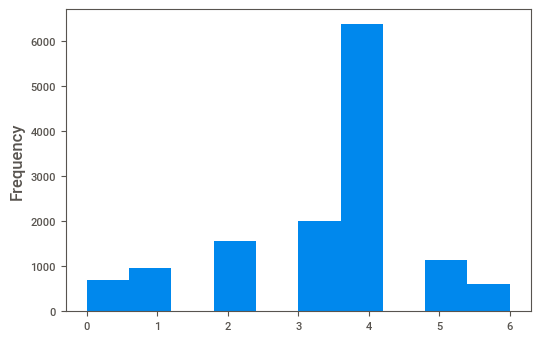

In [74]:
isleido['Release Date'].dt.weekday.plot(kind = 'hist')

In [75]:
df['IMDb Score'].value_counts(normalize=True)

0.0    0.135544
6.5    0.032836
6.6    0.032771
6.8    0.032577
6.3    0.032189
         ...   
1.6    0.000129
9.4    0.000065
9.7    0.000065
1.5    0.000065
1.0    0.000065
Name: IMDb Score, Length: 84, dtype: float64

In [76]:
df[['Release Date','IMDb Score']].mean()


IMDb Score    5.615681
dtype: float64

## 7 info is web nuorodos

In [77]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site', 'Ar_movie'],
      dtype='object')

In [78]:
df['IMDb Link'].isna().sum()

2302

In [79]:
df['Netflix Link'].isna().sum()

0

In [80]:
def link_to_id(text):
    if isinstance(text,str):
        return text[-9:]
    else:
        return text
        

In [81]:
df['imdb_id'] = df['IMDb Link'].apply(link_to_id)

In [82]:
df['imdb_id'].describe()

count         13169
unique        12839
top       tt0120915
freq             12
Name: imdb_id, dtype: object

In [83]:
df['imdb_id'].isna().sum()

2302

In [84]:
df['imdb_id'].value_counts()

tt0120915    12
tt5607970     9
tt0461936     8
tt2582782     6
tt1396484     6
             ..
t10220476     1
tt8716800     1
tt1618434     1
tt9204606     1
tt1518809     1
Name: imdb_id, Length: 12839, dtype: int64

In [85]:
df.loc[df['imdb_id'] == 'tt0120915'][:3]
# Patikrinau www adresus gavau Star wars nebenaudosiu

Title  \
16                                          I   
244  Ill Always Know What You Did Last Summer   
306                                   Im Home   

                                  Genre  \
16   Action, Adventure, Fantasy, Sci-Fi   
244  Action, Adventure, Fantasy, Sci-Fi   
306  Action, Adventure, Fantasy, Sci-Fi   

                                                  Tags          Languages  \
16                               Dramas,Swedish Movies  English, Sanskrit   
244        Horror Films,Films Based on Books,US Movies  English, Sanskrit   
306  Mystery Programmes,Drama Programmes,Japanese T...  English, Sanskrit   

    Series or Movie  Hidden Gem Score  \
16            Movie               2.8   
244           Movie               2.8   
306          Series               2.8   

                                  Country Availability  Runtime      Director  \
16   Lithuania,Poland,France,Italy,Spain,Greece,Cze...        4  George Lucas   
244                 Thailand,Singapore,India,Hong Kong        4  George Lucas   
306              Thailand,Singapore,Malaysia,Hong Kong        2  George Lucas   

           Writer  ...                            Netflix Link  \
16   George Lucas  ...  https://www.netflix.com/watch/81382114   
244  George Lucas  ...  https://www.netflix.com/watch/70051473   
306  George Lucas  ...  https://www.netflix.com/watch/81351300   

                                IMDb Link  \
16   https://www.imdb.com/title/tt0120915   
244  https://www.imdb.com/title/tt0120915   
306  https://www.imdb.com/title/tt0120915   

                                               Summary  IMDb Votes  \
16   young man seek ident begin romanc becom compli...    733336.0   
244  simpl fourth juli prank goe terribl wrong turn...    733336.0   
306  elit businessman father embark journey self di...    733336.0   

                                                 Image  \
16   https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...   
244  https://occ-0-2340-64.1.nflxso.net/dnm/api/v6/...   
306  https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...   

                                                Poster  \
16   https://m.media-amazon.com/images/M/MV5BYTRhNj...   
244  https://m.media-amazon.com/images/M/MV5BYTRhNj...   
306  https://m.media-amazon.com/images/M/MV5BYTRhNj...   

                                    TMDb Trailer Trailer Site Ar_movie  \
16   https://www.youtube.com/watch?v=bD7bpG-zDJQ      YouTube        1   
244  https://www.youtube.com/watch?v=bD7bpG-zDJQ      YouTube        1   
306                                          NaN          NaN        0   

       imdb_id  
16   tt0120915  
244  tt0120915  
306  tt0120915  

[3 rows x 31 columns]

In [86]:
df['Netflix Link']

0        https://www.netflix.com/watch/81415947
1        https://www.netflix.com/watch/81041267
2        https://www.netflix.com/watch/81305978
3        https://www.netflix.com/watch/81336456
4        https://www.netflix.com/watch/81078393
                          ...                  
15475    https://www.netflix.com/watch/80031595
15476    https://www.netflix.com/watch/70242630
15477    https://www.netflix.com/watch/70259784
15478    https://www.netflix.com/watch/70221348
15479    https://www.netflix.com/watch/70241791
Name: Netflix Link, Length: 15471, dtype: object

In [87]:
def link_to_nid(text):
    if isinstance(text,str):
        return text[-8:]
    else:
        return text

In [88]:
df['netflix_id'] = df['Netflix Link'].apply(link_to_nid)

In [89]:
df['netflix_id'].value_counts()

81415947    1
80081506    1
80100937    1
80119145    1
80081863    1
           ..
81156864    1
81004276    1
81050688    1
81156872    1
70241791    1
Name: netflix_id, Length: 15471, dtype: int64